In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib import style
import pickle
import colorsys
import csv
import algo as map
style.use('plotting.mplstyle')

/tmp/ipykernel_2896132/969254542.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2025-02-25 14:31:43.512459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-25 14:31:43.736329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot

## Load in mapped paths

In [2]:
kappa_values_2d = [4.5, 9.0, 12.8]
kappa_values_3d = [12, 13, 9]

In [3]:
df_2d = pd.read_csv("mapped_paths_2D.csv")
df_3d = pd.read_csv("mapped_paths_3D.csv")

## Generate background points

In [4]:
PS = []
map.load_and_update_model('90')
lams = [[0.16, 0.0, 0, -0.5, 0.0, 0, -0.5],[0.1875, 0, 0, 0, 0, 0, 0],[0.24, 0, 0, 0.5, 0, 0, 0.5]]
for lam0 in lams:
    ps = map.ParameterSpace(lam0 = lam0,  sample=10000, precession = False)
    PS.append(ps)

2025-02-25 14:31:47.461456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-02-25 14:31:47.461495: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-25 14:31:47.461514: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ldas-pcdev5): /proc/driver/nvidia/version does not exist
2025-02-25 14:31:47.461860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████| 9999/9999 [00:00<00:00, 10732.79it/s]


313/313 [==============================] - 1s 1ms/step


100%|██████████| 9999/9999 [00:00<00:00, 18552.02it/s]


313/313 [==============================] - 0s 1ms/step


100%|██████████| 9999/9999 [00:00<00:00, 12438.83it/s]


313/313 [==============================] - 0s 1ms/step


In [7]:
def fig7(name):
    fig = plt.figure(figsize=(19, 6))  
    gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1,0.04,  0.07],  wspace=0, hspace=0)
    
    axes = []
    for col in range(3):
        ax = fig.add_subplot(gs[0, col])
        axes.append(ax)

        if col > 0:
            ax.yaxis.set_visible(False)

    norm = Normalize(vmin=0, vmax=1)
    plot_indices = [0,4,8]
    for idx, (i, ax) in enumerate(zip(plot_indices, axes)):
        
        #Add background points
        ax.scatter(PS[idx].eta, PS[idx].chi_eff, c=PS[idx].mismatch, cmap='pink',rasterized = True)

        #Add 2D points
        eta_vals = df_2d[f"eta_{i}"]
        chi_eff_vals = df_2d[f"chi_eff_{i}"]
       
        ax.plot(eta_vals, chi_eff_vals, color='lightskyblue', alpha = 0.9,linestyle='-', lw=4, zorder=100, label ='$\mathbf{x^{(\mathrm{eff})}}$')
        
        ax.plot(PS[idx].eta[0], PS[idx].chi_eff[0], '*', markersize=35, markerfacecolor='black',
                markeredgecolor='lightskyblue', markeredgewidth=1.5, zorder =150)

        # Add 3D points
        eta_vals = df_3d[f"eta_{i}"]
        chi_eff_vals = df_3d[f"chi_eff_{i}"]
        ax.plot(eta_vals, chi_eff_vals, color='lightskyblue', linestyle='--', lw=4.5,zorder=100, label ='$\mathbf{x^{(\mathrm{al})}}$')
        

        ax.set_xlim(0.122, 0.25)
        ax.set_ylim(-0.9, 0.9)
        
        if i == 8:
            ax.legend(loc ="lower right", frameon = True, fontsize = 20)
        
        # Loop through and plot kappa annotations
        for idx, ax in enumerate(axes): 
            kappa_2d = kappa_values_2d[idx]
            kappa_3d = kappa_values_3d[idx]

            # Add annotation to each panel
            ax.annotate(
               rf'$r_\mathrm{{(eff)}}={kappa_2d}$' + '\n' + rf'$r_\mathrm{{(al)}}={kappa_3d}$',
                xy=(0.1, 0.85), 
                xycoords='axes fraction', 
                fontsize=20, 
                fontweight='bold', 
                bbox=dict(boxstyle="square,pad=0.5", edgecolor="k", linestyle='--', facecolor="white")
            )

    # Set y-ticks for the first subplot
    axes[0].set_yticks([-0.5, 0, 0.5])
    axes[0].tick_params(axis='y', labelsize=28)

    # Set x-ticks for the bottom subplots
    for ax in axes:
        ax.set_xticks([0.13, 0.17, 0.21])
        ax.tick_params(axis='x', labelsize=28)
        
  

    # Add labels for axes
    fig.text(0.5, -0.01, '$\eta$', ha='center', fontsize=36)
    fig.text(-0.01, 0.5, '$\chi_{\mathrm{eff}}$', va='center', rotation='vertical', fontsize=36)

    # Add the collective colorbar to the right
    cbar_ax = fig.add_subplot(gs[:, 4])
    sm = ScalarMappable(cmap='pink',norm = norm)
    sm.set_array([])  # Empty array for colormap reference
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('$\mathcal{MM}$', size=32)
    cbar.ax.tick_params(labelsize=22)
  
    plt.tight_layout()
    plt.savefig(name + '.png', bbox_inches='tight', pad_inches=0.5)

/tmp/ipykernel_2896132/544491875.py:75: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sm, cax=cbar_ax)


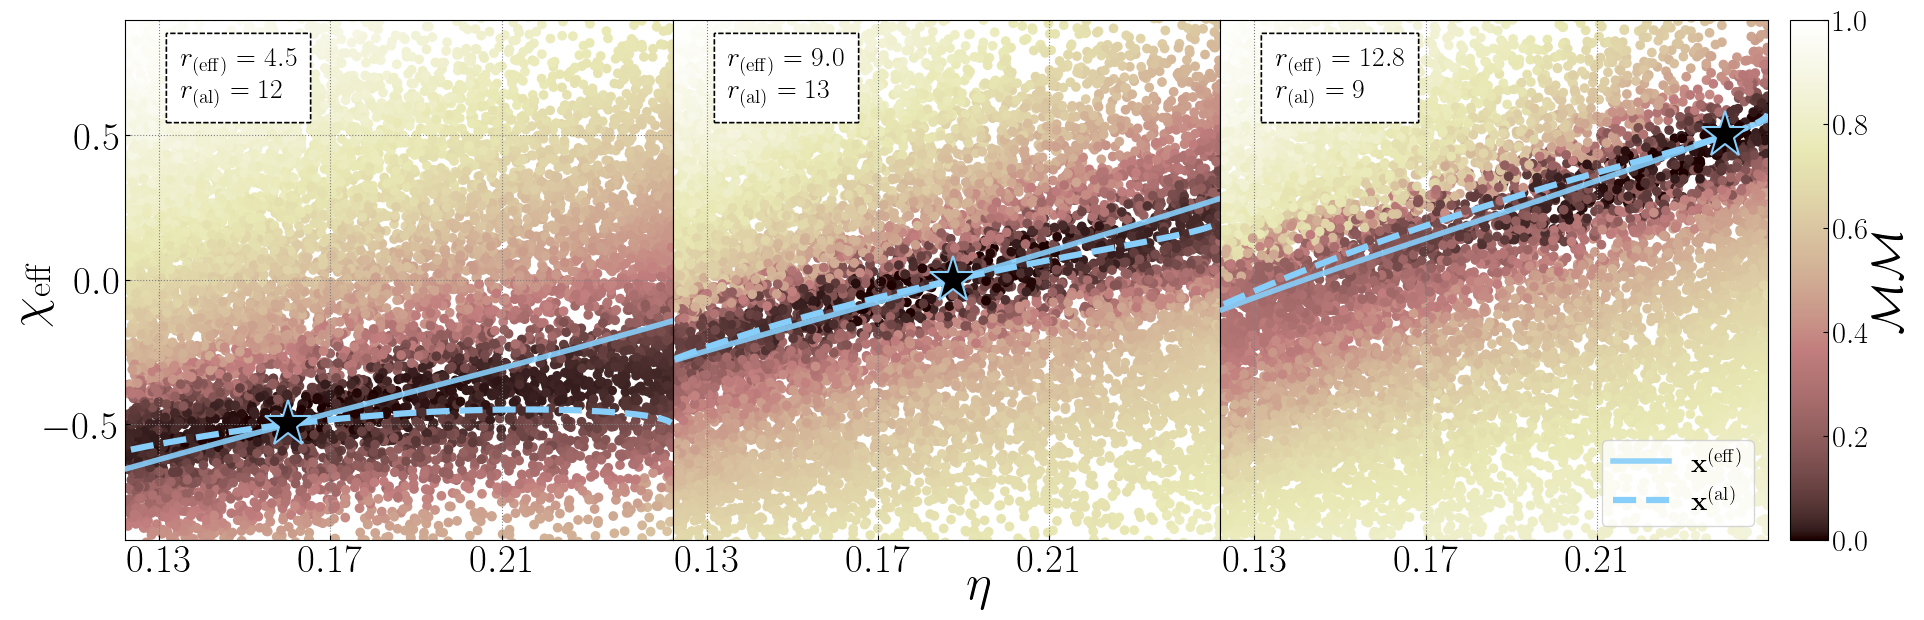

In [8]:
fig7('90_2D_3D')